In [10]:
from txgnn import TxData, TxGNN, TxEval
import requests

TxData = TxData(data_folder_path = '/Users/emmatysinger/Develop/meng/kg/')

/Users/emmatysinger/opt/anaconda3/envs/txgnn_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found local copy...
Found local copy...
Found local copy...


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
kg_df = pd.read_csv('../kg/kg.csv')
nodes_df = pd.read_csv('../kg/node.csv', sep='\t')
edges_df = pd.read_csv('../kg/edges.csv')


## Node Exploration

In [6]:
print("Node Data:")
nodes_df.head()

Node Data:


,node_index,node_id,node_type,node_name,node_source
0,0,9796,gene/protein,PHYHIP,NCBI
1,1,7918,gene/protein,GPANK1,NCBI
2,2,8233,gene/protein,ZRSR2,NCBI
3,3,4899,gene/protein,NRF1,NCBI
4,4,5297,gene/protein,PI4KA,NCBI


In [14]:
# getting unique node types
unique_node_types = nodes_df['node_type'].value_counts()
unique_node_types_df = unique_node_types.to_frame().reset_index()
unique_node_types_df.columns = ['node_type', 'count']
unique_node_types_df


,node_type,count
0,biological_process,28642
1,gene/protein,27671
2,disease,17080
3,effect/phenotype,15311
4,anatomy,14035
5,molecular_function,11169
6,drug,7957
7,cellular_component,4176
8,pathway,2516
9,exposure,818


In [16]:
# get protein nodes
protein_nodes = nodes_df[nodes_df['node_type'] == 'gene/protein']
protein_nodes.set_index('node_index', inplace=True)
protein_nodes

,node_id,node_type,node_name,node_source
node_index,,,,
0,9796,gene/protein,PHYHIP,NCBI
1,7918,gene/protein,GPANK1,NCBI
2,8233,gene/protein,ZRSR2,NCBI
3,4899,gene/protein,NRF1,NCBI
4,5297,gene/protein,PI4KA,NCBI
...,...,...,...,...
127435,101154753,gene/protein,PANDAR,NCBI
127436,102800311,gene/protein,TP53COR1,NCBI
127437,101928079,gene/protein,SLC44A3-AS1,NCBI


In [18]:
# getting unique sources
unique_sources = protein_nodes['node_source'].value_counts()
unique_sources_df = unique_sources.to_frame().reset_index()
unique_sources_df.columns = ['node_source', 'count']
unique_sources_df

,node_source,count
0,NCBI,27671


## Edge Exploration

In [20]:
print("Edges Data:")
edges_df.head()

Edges Data:


,relation,display_relation,x_index,y_index
0,protein_protein,ppi,0,8889
1,protein_protein,ppi,1,2798
2,protein_protein,ppi,2,5646
3,protein_protein,ppi,3,11592
4,protein_protein,ppi,4,2122


In [24]:
print('Unique relations: ')
unique_relations = edges_df['relation'].value_counts()
unique_relations_df = unique_relations.to_frame().reset_index()
unique_relations_df.columns = ['relation', 'count']
unique_relations_df

Unique relations: 


,relation,count
0,anatomy_protein_present,3036406
1,drug_drug,2672628
2,protein_protein,642150
3,disease_phenotype_positive,300634
4,bioprocess_protein,289610
5,cellcomp_protein,166804
6,disease_protein,160822
7,molfunc_protein,139060
8,drug_effect,129568
9,bioprocess_bioprocess,105772


In [122]:
relation_sources = unique_kg_df_proteins[['relation', 'y_source']].drop_duplicates(subset=['relation'], keep='first').reset_index(drop=True).rename(columns={'y_source': 'data_source'})
relation_sources

,relation,data_source
0,anatomy_protein_absent,UBERON
1,anatomy_protein_present,UBERON
2,bioprocess_protein,GO
3,cellcomp_protein,GO
4,disease_protein,MONDO
5,drug_protein,DrugBank
6,exposure_protein,CTD
7,molfunc_protein,GO
8,pathway_protein,REACTOME
9,phenotype_protein,HPO


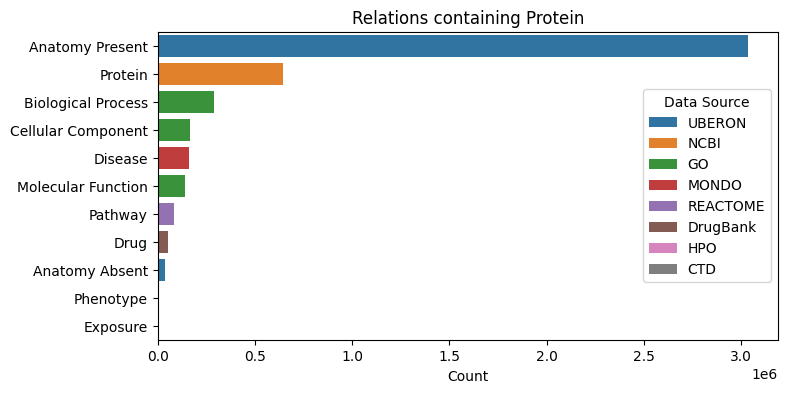

In [128]:
# unique relations containing protein
protein_relations = unique_relations_df[unique_relations_df.relation.str.contains('protein')].reset_index(drop=True)
protein_relations = merged_df = pd.merge(protein_relations, relation_sources, on='relation', how='left')
protein_relations['relation'] = ['Anatomy Present', 'Protein', 'Biological Process', 'Cellular Component', 'Disease', 'Molecular Function',
                                 'Pathway', 'Drug', 'Anatomy Absent', 'Phenotype', 'Exposure']

plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
sns.barplot(x='count', y='relation', data=protein_relations, hue='data_source',dodge=False)

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('')
plt.title('Relations containing Protein')
plt.legend(title='Data Source')

# Show the plot
plt.show()

In [129]:
protein_relations

,relation,count,data_source
0,Anatomy Present,3036406,UBERON
1,Protein,642150,NCBI
2,Biological Process,289610,GO
3,Cellular Component,166804,GO
4,Disease,160822,MONDO
5,Molecular Function,139060,GO
6,Pathway,85292,REACTOME
7,Drug,51306,DrugBank
8,Anatomy Absent,39774,UBERON
9,Phenotype,6660,HPO


In [25]:
print('Unique display relations: ')
unique_display_relations = edges_df['display_relation'].value_counts()
unique_display_relations_df = unique_display_relations.to_frame().reset_index()
unique_display_relations_df.columns = ['display relation', 'count']
unique_display_relations_df

Unique display relations: 


,display relation,count
0,expression present,3036406
1,synergistic interaction,2672628
2,interacts with,686550
3,ppi,642150
4,phenotype present,300634
5,parent-child,281744
6,associated with,167482
7,side effect,129568
8,contraindication,61350
9,expression absent,39774


In [37]:
unique_pairs_counts = edges_df.groupby(['relation', 'display_relation']).size().reset_index(name='count')
unique_pair_counts_df = unique_pairs_counts
unique_pair_counts_df.columns = ['relation','display relation', 'count']
unique_pair_counts_df[unique_pair_counts_df.relation.str.contains('protein')].reset_index(drop=True)

,relation,display relation,count
0,anatomy_protein_absent,expression absent,39774
1,anatomy_protein_present,expression present,3036406
2,bioprocess_protein,interacts with,289610
3,cellcomp_protein,interacts with,166804
4,disease_protein,associated with,160822
5,drug_protein,carrier,1728
6,drug_protein,enzyme,10634
7,drug_protein,target,32760
8,drug_protein,transporter,6184
9,exposure_protein,interacts with,2424


## Whole Knowledge Graph Exploration

In [9]:
print("Knowledge Graph Data:")
kg_df.head()

Knowledge Graph Data:


,relation,display_relation,x_id,x_type,x_name,x_source,y_id,y_type,y_name,y_source
0,protein_protein,ppi,9796,gene/protein,PHYHIP,NCBI,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,7918,gene/protein,GPANK1,NCBI,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,8233,gene/protein,ZRSR2,NCBI,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,4899,gene/protein,NRF1,NCBI,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,5297,gene/protein,PI4KA,NCBI,8601,gene/protein,RGS20,NCBI


In [46]:
unique_kg_df = kg_df.groupby(['relation', 'display_relation','x_type', 'y_type', 'y_source']).size().reset_index(name='count')
unique_kg_df_proteins = unique_kg_df[(unique_kg_df['x_type'] == 'gene/protein') & (unique_kg_df['relation'].str.contains('protein'))].reset_index(drop=True)
unique_kg_df_proteins

,relation,display_relation,x_type,y_type,y_source,count
0,anatomy_protein_absent,expression absent,gene/protein,anatomy,UBERON,19887
1,anatomy_protein_present,expression present,gene/protein,anatomy,UBERON,1518203
2,bioprocess_protein,interacts with,gene/protein,biological_process,GO,144805
3,cellcomp_protein,interacts with,gene/protein,cellular_component,GO,83402
4,disease_protein,associated with,gene/protein,disease,MONDO,63704
5,disease_protein,associated with,gene/protein,disease,MONDO_grouped,16707
6,drug_protein,carrier,gene/protein,drug,DrugBank,864
7,drug_protein,enzyme,gene/protein,drug,DrugBank,5317
8,drug_protein,target,gene/protein,drug,DrugBank,16380
9,drug_protein,transporter,gene/protein,drug,DrugBank,3092


In [52]:
unique_molecular_function_kg = kg_df[(kg_df['relation'] == 'molfunc_protein')&(kg_df['x_type'] == 'gene/protein')][['y_name']].drop_duplicates().reset_index(drop=True)
unique_molecular_function_kg

,y_name
0,interleukin-1 binding
1,endopeptidase inhibitor activity
2,enzyme binding
3,tumor necrosis factor binding
4,protease binding
...,...
4364,D-ribitol-5-phosphate cytidylyltransferase act...
4365,cytidylyltransferase activity
4366,aconitate decarboxylase activity
4367,lysine N-methyltransferase activity


In [59]:
protein_molecular_func = kg_df[(kg_df['relation'] == 'molfunc_protein')&(kg_df['x_type'] == 'gene/protein')].groupby('x_name').size().reset_index(name='number of molfunc relations')
protein_pathway = kg_df[(kg_df['relation'] == 'pathway_protein')&(kg_df['x_type'] == 'gene/protein')].groupby('x_name').size().reset_index(name='number of pathway relations')
protein_disease = kg_df[(kg_df['relation'] == 'disease_protein')&(kg_df['x_type'] == 'gene/protein')].groupby('x_name').size().reset_index(name='number of disease relations')


In [61]:
merged_df = pd.merge(protein_molecular_func, protein_pathway, on='x_name', how='outer')
merged_df = pd.merge(merged_df, protein_disease, on='x_name', how='outer')
merged_df.fillna(0, inplace=True)
merged_df


,x_name,number of molfunc relations,number of pathway relations,number of disease relations
0,A1CF,4.0,2.0,0.0
1,A2M,11.0,4.0,29.0
2,A2ML1,4.0,0.0,8.0
3,A3GALT2,3.0,0.0,0.0
4,A4GALT,4.0,0.0,2.0
...,...,...,...,...
19017,XKRY,0.0,0.0,1.0
19018,YWHAZP5,0.0,0.0,1.0
19019,ZNF667-AS1,0.0,0.0,27.0
19020,ZNRD1,0.0,0.0,5.0


In [71]:
grouped_molfunc_df = merged_df.groupby('number of molfunc relations').size().reset_index(name='molfunc')
grouped_molfunc_df = grouped_molfunc_df.rename(columns={'number of molfunc relations': 'number of relations'})

grouped_pathway_df = merged_df.groupby('number of pathway relations').size().reset_index(name='pathway')
grouped_pathway_df = grouped_pathway_df.rename(columns={'number of pathway relations': 'number of relations'})

grouped_disease_df = merged_df.groupby('number of disease relations').size().reset_index(name='disease')
grouped_disease_df = grouped_disease_df.rename(columns={'number of disease relations': 'number of relations'})

In [72]:
merged_grouped_df = pd.merge(grouped_molfunc_df, grouped_pathway_df, on='number of relations', how='outer')
merged_grouped_df = pd.merge(merged_grouped_df, grouped_disease_df, on='number of relations', how='outer')
merged_grouped_df.fillna(0, inplace=True)
merged_grouped_df

,number of relations,molfunc,pathway,disease
0,0.0,874.0,8173.0,9942.0
1,1.0,3668.0,4936.0,1626.0
2,2.0,3625.0,2166.0,1084.0
3,3.0,3172.0,1084.0,1065.0
4,4.0,2309.0,559.0,638.0
...,...,...,...,...
131,208.0,0.0,0.0,1.0
132,225.0,0.0,0.0,1.0
133,247.0,0.0,0.0,1.0
134,257.0,0.0,0.0,1.0


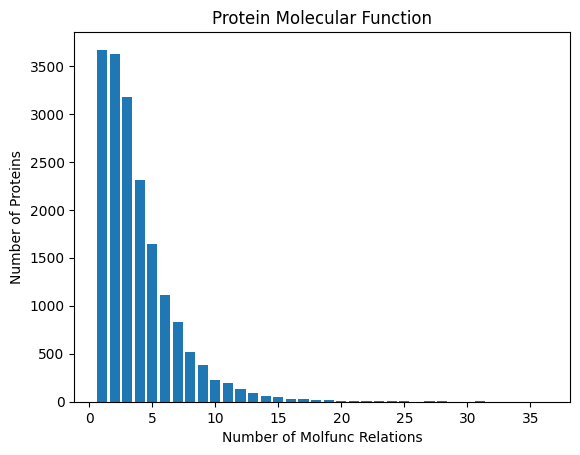

In [57]:
# Group the data by the number of molfunc relations and count the number of proteins
grouped_df = protein_molecular_func.groupby('number of molfunc relations').size().reset_index(name='number of proteins')

# Create the bar chart
plt.bar(grouped_df['number of molfunc relations'], grouped_df['number of proteins'])

# Customize the chart labels and title
plt.xlabel('Number of Molfunc Relations')
plt.ylabel('Number of Proteins')
plt.title('Protein Molecular Function')

# Display the chart
plt.show()


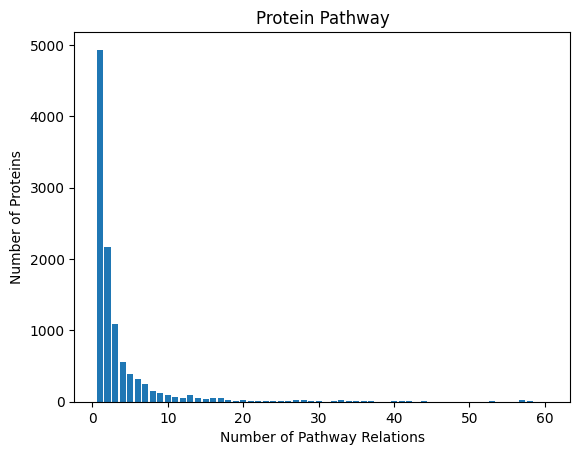

In [80]:
# Group the data by the number of molfunc relations and count the number of proteins
grouped_df = protein_pathway.groupby('number of pathway relations').size().reset_index(name='number of proteins')
grouped_df = grouped_df[grouped_df['number of pathway relations']<=60]

# Create the bar chart
plt.bar(grouped_df['number of pathway relations'], grouped_df['number of proteins'])
#plt.yscale('log')

# Customize the chart labels and title
plt.xlabel('Number of Pathway Relations')
plt.ylabel('Number of Proteins')
plt.title('Protein Pathway')

# Display the chart
plt.show()


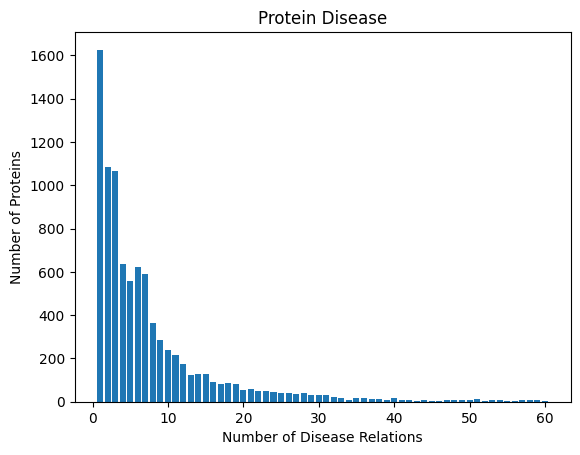

In [83]:
# Group the data by the number of molfunc relations and count the number of proteins
grouped_df = protein_disease.groupby('number of disease relations').size().reset_index(name='number of proteins')
grouped_df = grouped_df[grouped_df['number of disease relations']<=60]

# Create the bar chart
plt.bar(grouped_df['number of disease relations'], grouped_df['number of proteins'])
#plt.yscale('log')

# Customize the chart labels and title
plt.xlabel('Number of Disease Relations')
plt.ylabel('Number of Proteins')
plt.title('Protein Disease')

# Display the chart
plt.show()

## Drug Disease Exploration

In [90]:
unique_kg_df = kg_df.groupby(['relation', 'display_relation','x_type', 'y_type']).size().reset_index(name='count')
unique_kg_df_drug_disease = unique_kg_df[((unique_kg_df['relation']=='contraindication')|(unique_kg_df['relation']=='indication'))&(unique_kg_df['x_type']=='drug')].reset_index(drop=True)
unique_kg_df_drug_disease

,relation,display_relation,x_type,y_type,count
0,contraindication,contraindication,drug,disease,30675
1,indication,indication,drug,disease,9388


In [98]:
drug_disease_count = kg_df[((kg_df['relation']=='contraindication')|(kg_df['relation']=='indication'))&(kg_df['x_type'] == 'disease')].groupby('x_name').size().reset_index(name='number of relations')
grouped_drug_disease_count = drug_disease_count.groupby('number of relations').size().reset_index(name='number of diseases')

In [108]:
diseases_nonzero_drugdisease = grouped_drug_disease_count['number of diseases'].sum()
total_diseases = nodes_df[nodes_df['node_type'] == 'disease'].groupby('node_name').size().reset_index(name='number of diseases').sum()
diseases_nonzero_drugdisease

1859

In [109]:
total_diseases

node_name             'psoriatic arthritis, susceptibility to10q22.3...
number of diseases                                                17080
dtype: object

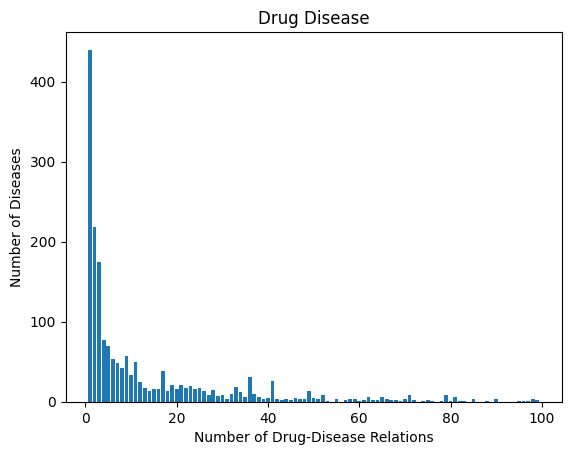

In [101]:
# Create the bar chart
grouped_drug_disease_count = grouped_drug_disease_count[grouped_drug_disease_count['number of relations']<=100]
plt.bar(grouped_drug_disease_count['number of relations'], grouped_drug_disease_count['number of diseases'])
#plt.yscale('log')

# Customize the chart labels and title
plt.xlabel('Number of Drug-Disease Relations')
plt.ylabel('Number of Diseases')
plt.title('Drug Disease')

# Display the chart
plt.show()

In [96]:
grouped_drug_disease_count

,number of relations,relations
0,1,440
1,2,218
2,3,175
3,4,77
4,5,70
...,...,...
130,396,1
131,410,1
132,411,1
133,582,2


In [85]:
unique_kg_df

,relation,display_relation,x_type,y_type,y_source,count
0,anatomy_anatomy,parent-child,anatomy,anatomy,UBERON,28064
1,anatomy_protein_absent,expression absent,anatomy,gene/protein,NCBI,19887
2,anatomy_protein_absent,expression absent,gene/protein,anatomy,UBERON,19887
3,anatomy_protein_present,expression present,anatomy,gene/protein,NCBI,1518203
4,anatomy_protein_present,expression present,gene/protein,anatomy,UBERON,1518203
...,...,...,...,...,...,...
59,pathway_protein,interacts with,pathway,gene/protein,NCBI,42646
60,phenotype_phenotype,parent-child,effect/phenotype,effect/phenotype,HPO,37472
61,phenotype_protein,associated with,effect/phenotype,gene/protein,NCBI,3330
62,phenotype_protein,associated with,gene/protein,effect/phenotype,HPO,3330
